# **PRÁCTICA 6:  Machine Learning - Parte 3: Random Forest**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos


En esta parte vamos a implementar el Random Forest

Random Forest respecto a Bagging, en realidad solo tiene una diferencia (lo que vamos a ver nosostros **en implementación** )

Diferencias: 

- Tenemos una mejora bastante relevante en cuanto a regresión y predicción sino que a demás esa mejora hace que el algoritmo se sobreentrene bastante menos que en el caso del bagging


## A mano

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston, load_diabetes, load_linnerud
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from scipy.stats import mode as moda

In [ ]:
X, y = load_diabetes(return_X_y=True)

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3)

### Ejercicio 1: Implementa el algoritmo de Random Forest.
Básicamente es igual que el de Bagging donde se limita el número de características utilizadas en cada nodo para tomar la decisión. En lugar de usarlas todas como hasta ahora se cogen unas pocas aleatoriamente.

Ayuda:
- Para regresión se usa típicamente: max_features = "sqrt"
- Para clasificación se usa típicamente: max_features = "log2"

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
dr = DecisionTreeRegressor()
dr.fit(Xtr, ytr)
yp = dr.predict(Xts)
R2 = r2_score(yts, yp)
mse = mean_squared_error(yts, yp)
rmse = np.sqrt(mse)

print("R^2:  ", R2)
print("MSE:  ", mse)
print("RMSE: ", rmse)

print("-------------------------------------")

ym = np.mean(ytr) * np.ones((Xts.shape[0])) # Repetir el valor de la media tantas veces 

print("R^2  mean: ", r2_score(yts, ym))
print("MSE  mean: ", mean_squared_error(yts, ym))
print("RMSE mean: ", np.sqrt(mean_squared_error(yts, ym)))


R^2:   -0.12716012035502433
MSE:   6400.06015037594
RMSE:  80.00037593896631
-------------------------------------
R^2  mean:  -0.006942001348826166
MSE  mean:  5717.4568725360705
RMSE mean:  75.61386693283231


In [ ]:
nt = 100 
tree_list = []

for i in range(nt):
    
    # Esto muestrea de este conjunto de datos con repetición.
    X, y = resample(Xtr, ytr, replace = True)
    # La clave de random forest es utilizar en cada particion un número aleatorio de variables.
    # En concreto raíz de 10
    new_tree = DecisionTreeRegressor(max_features = "sqrt")
    new_tree = new_tree.fit(X, y)
    tree_list.append(new_tree)

In [ ]:
def predict_rf(tree_list, X):
    nt = len(tree_list)
    # Cuantos elementos voy a predecir y cuantas veces voy a predecir 
    yp = np.zeros((X.shape[0],nt))

    for i in range(nt):
        #obtenemos con cada arbol y guardamos resultados
        yp[:,i] = tree_list[i].predict(X)
    
    # Obtenemos la media con np.mean
    yp = np.mean(yp, axis = 1) #axix = 1 para que tenga en cuenta las filas en la votación
    
    return yp

yp_rf = predict_rf(tree_list, Xts)

R2 = r2_score(yts, yp)
mse = mean_squared_error(yts, yp)
rmse = rmse = np.sqrt(mse)

print("R^2:  ", R2)
print("MSE:  ", mse)
print("RMSE: ", rmse)

R^2:   -0.12716012035502433
MSE:   6400.06015037594
RMSE:  80.00037593896631


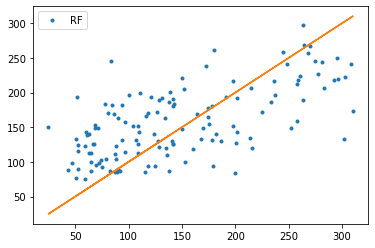

In [ ]:
# Comparamos resultados de un árbol (yp) y de varios árboles (yp_rf)
#plt.plot(yts, yp, '.', label = 'One tree')
plt.plot(yts, yp_rf, '.', label = 'RF');
plt.plot(yts, yts) #es la predicción perfecta
plt.legend()

# Accuracy dependiendo del número de árboles

### Ejercicio 2: Evalua el algoritmo para distinto número de árboles y crea una gráfica donde se vea como se va evolucionando el error cuando se aumenta el número de árboles ¿Se reduce el error?

Ayuda: Toma valores de 1 a 100 árboles en el bosque.

In [ ]:
from sklearn.metrics import accuracy_score

X, y = load_diabetes(return_X_y = True)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3)

nt = 100

ACC   = []
Ts = list(range(1, 110, 10))
for nt in Ts:
    
    # Creamos una lista para guardar cada uno de los árboles.
    tree_list = []
    
    # Entrenamiento 
    for a in range(nt):
        
        #generamos el nuevo conjunto de datos para entrenar
        Xtr_new, ytr_new = resample(Xtr, ytr, replace = True)
        
        # Entrenamos con el nuevo conjunto de datos.
        dtr = DecisionTreeRegressor(max_features = "sqrt")
        new_tree = dtr.fit(Xtr_new, ytr_new)
        
        #Añadimos a la lista creada anteriormente el árbol entrenado.
        tree_list.append(new_tree)
    
    # Predicción 
    yp = dtr.predict(Xts)
        
    # Error
    ACC.append(accuracy_score(yts,yp))

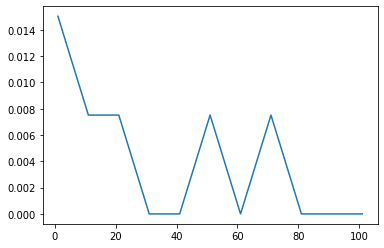

In [ ]:
# Muestra la evolución del error con respecto al número de árboles usados
plt.plot(Ts, ACC);

# RF en sklearn

### Ejercicio 3: Utilizando la implementación que hay en el sklearn, evalua el algoritmo para distinto número de árboles y crea una gráfica donde se vea como se va reduciendo el error cuando se aumenta el número de árboles.

Ayuda: Toma valores de 1 a 100 árboles en el bosque.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import EstraTreesRegressor, no me deja descargarla 
#son todavía mas aleatorios que los random forest

X, y = load_diabetes(return_X_y = True)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3)

nt = 100

ACC   = []

Ts = list(range(1, 101))

for nt in Ts:
    
    #generamos el nuevo conjunto de datos para entrenar
    Xtr_new, ytr_new = resample(Xtr, ytr, replace = True)
    
    # Entrenamos con el nuevo conjunto de datos.
    rf = RandomForestRegressor(n_estimators = nt,
                                max_depth = 2,
                                max_features = "sqrt")
    
    new_tree = rf.fit(Xtr_new, ytr_new)
    
    yp = rf.predict(Xts)
    mse = mean_squared_error(yts, yp)
    
        
    #Añadimos a la lista creada anteriormente el árbol entrenado.
    ACC.append(mse)

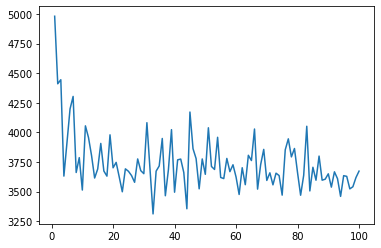

In [ ]:
plt.plot(Ts, ACC)

### ¿Se reduce?

En esta gráfica y utilizando la implementación que hay en el sklearn con  el algoritmo para distinto número de árboles podemos ver como se va reduciendo el error cuando se aumenta el número de árboles.

**NOTA** = La función joblib, te facilita hacer la paralelización en algoritmos. Que tu puedas coger y determinar las tareas en paralelo para aprovechar los cores de nuestro ordenador.

# Jugar con los parámetros


### Ejercicio 4: ¿Qué hace cada uno de los siguientes parámetros?

Haz un ejemplo para cada uno donde se vea el efecto.

n_estimators, max_depth, max_features, bootstrap 

### Información adicional (Apuntes)

Un RandomForest es un metaestimador que se ajusta a una serie de árboles de decisión de clasificación en varias submuestras del conjunto de datos y utiliza promedios para mejorar la precisión predictiva y controlar el sobreajuste. El tamaño de la submuestra se controla con el max_samplesparámetro if bootstrap=True(predeterminado); de lo contrario, se utiliza todo el conjunto de datos para construir cada árbol.

- **n_estimators** *int, predeterminado = 100*, que nos indica la cantidad de árboles que queremos en el bosque.   



- **max_depth** *int, predeterminado = Ninguno*, que nos indica la profundidad máxima del árbol. Es decir, si es *None*, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de *min_samples_split* muestras.   



- **max_features** *{"auto", "sqrt", "log2"}, int o float, predeterminado = "auto"*, como hemos visto antes esto nos indica la cantidad de características a considerar al buscar la mejor división.   



- **bootstrap** *bool, predeterminado = True*, que nos indica cuantas muestras de bootstrap vamos a utilizar al construir árboles. Si es False, se usa todo el conjunto de datos para construir cada árbol. 


Veamos como estos parámentros influyen en nuestras gráficas:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import EstraTreesRegressor, no me deja descargarla 
#son todavía mas aleatorios que los random forest

X, y = load_diabetes(return_X_y = True)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3)

n_estimators = 20
max_depth = 2
max_features = "sqrt"
bootstrap = True

nt = 100
ACC_1   = []
Ts_1 = list(range(1, 101))

for nt in Ts_1:
    
    #generamos el nuevo conjunto de datos para entrenar
    Xtr_new, ytr_new = resample(Xtr, ytr, replace = True)
    
    # Entrenamos con el nuevo conjunto de datos.
    rf = RandomForestRegressor(n_estimators = n_estimators,
                                max_depth = max_depth,
                                max_features = max_features, 
                                bootstrap = bootstrap)
    
    new_tree = rf.fit(Xtr_new, ytr_new)
    
    yp = rf.predict(Xts)
    mse = mean_squared_error(yts, yp)
    
        
    #Añadimos a la lista creada anteriormente el árbol entrenado.
    ACC_1.append(mse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import EstraTreesRegressor, no me deja descargarla 
#son todavía mas aleatorios que los random forest

X, y = load_diabetes(return_X_y = True)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3)

n_estimators = 100
max_depth = 10
max_features = "sqrt"
bootstrap = True

nt = 100
ACC_2   = []
Ts_2 = list(range(1, 101))

for nt in Ts_1:
    
    #generamos el nuevo conjunto de datos para entrenar
    Xtr_new, ytr_new = resample(Xtr, ytr, replace = True)
    
    # Entrenamos con el nuevo conjunto de datos.
    rf = RandomForestRegressor(n_estimators = n_estimators,
                                max_depth = max_depth,
                                max_features = max_features, 
                                bootstrap = bootstrap)
    
    new_tree = rf.fit(Xtr_new, ytr_new)
    
    yp = rf.predict(Xts)
    mse = mean_squared_error(yts, yp)
    
        
    #Añadimos a la lista creada anteriormente el árbol entrenado.
    ACC_2.append(mse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import EstraTreesRegressor, no me deja descargarla 
#son todavía mas aleatorios que los random forest

X, y = load_diabetes(return_X_y = True)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3)

n_estimators = 100
max_depth = 2
max_features = "log2"
bootstrap = True

nt = 100
ACC_3   = []
Ts_3 = list(range(1, 101))

for nt in Ts_1:
    
    #generamos el nuevo conjunto de datos para entrenar
    Xtr_new, ytr_new = resample(Xtr, ytr, replace = True)
    
    # Entrenamos con el nuevo conjunto de datos.
    rf = RandomForestRegressor(n_estimators = n_estimators,
                                max_depth = max_depth,
                                max_features = max_features, 
                                bootstrap = bootstrap)
    
    new_tree = rf.fit(Xtr_new, ytr_new)
    
    yp = rf.predict(Xts)
    mse = mean_squared_error(yts, yp)
    
        
    #Añadimos a la lista creada anteriormente el árbol entrenado.
    ACC_3.append(mse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import EstraTreesRegressor, no me deja descargarla 
#son todavía mas aleatorios que los random forest

X, y = load_diabetes(return_X_y = True)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3)

n_estimators = 100
max_depth = 2
max_features = "log2"
bootstrap = False

nt = 100
ACC_4   = []
Ts_4 = list(range(1, 101))

for nt in Ts_1:
    
    #generamos el nuevo conjunto de datos para entrenar
    Xtr_new, ytr_new = resample(Xtr, ytr, replace = True)
    
    # Entrenamos con el nuevo conjunto de datos.
    rf = RandomForestRegressor(n_estimators = n_estimators,
                                max_depth = max_depth,
                                max_features = max_features, 
                                bootstrap = bootstrap)
    
    new_tree = rf.fit(Xtr_new, ytr_new)
    
    yp = rf.predict(Xts)
    mse = mean_squared_error(yts, yp)
    
        
    #Añadimos a la lista creada anteriormente el árbol entrenado.
    ACC_4.append(mse)

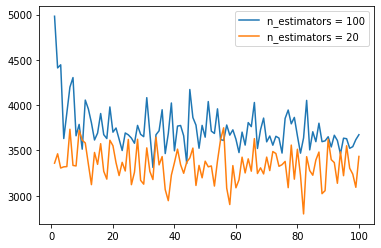

In [ ]:
plt.plot(Ts, ACC)
plt.plot(Ts_1, ACC_1)
plt.legend(['n_estimators = 100', 'n_estimators = 20']);

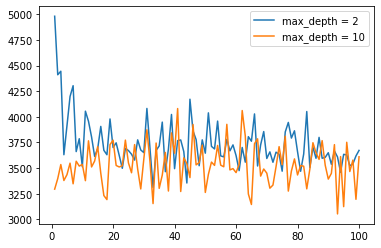

In [ ]:
plt.plot(Ts, ACC)
plt.plot(Ts_2, ACC_2)
plt.legend(['max_depth = 2', 'max_depth = 10']);

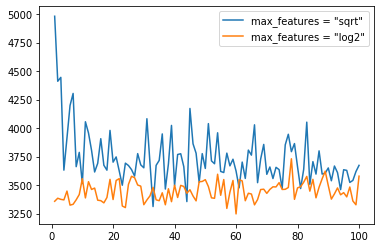

In [ ]:
plt.plot(Ts, ACC)
plt.plot(Ts_3, ACC_3)
plt.legend(['max_features = "sqrt"', 'max_features = "log2"']);

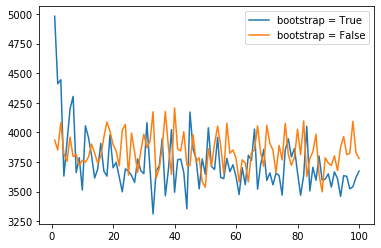

In [ ]:
plt.plot(Ts, ACC)
plt.plot(Ts_4, ACC_4)
plt.legend(['bootstrap = True', 'bootstrap = False']);